# Imports

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time

# Loading Images

In [2]:
# Images folder path
imgs_path = 'imgs/'

In [3]:
def load_stereo_imgs(left_img_path, right_img_path):
    imgL = cv.imread(left_img_path, 0)
    imgR = cv.imread(right_img_path, 0)

    return imgL, imgR

In [4]:
img1L, img1R = load_stereo_imgs(imgs_path + 'l1.png', imgs_path + 'r1.png')
img2L, img2R = load_stereo_imgs(imgs_path + 'l2.png', imgs_path + 'r2.png')
img3L, img3R = load_stereo_imgs(imgs_path + 'l3.png', imgs_path + 'r3.png')

# Sample Run

(289, 382)


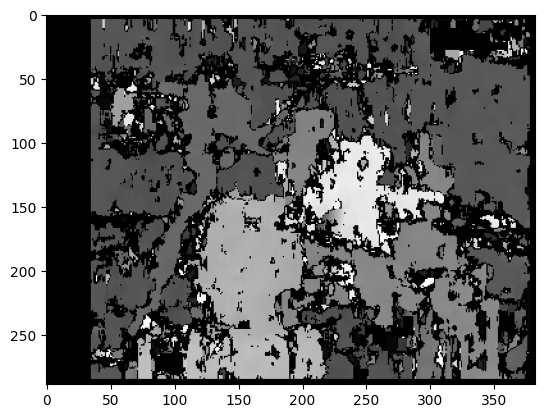

In [5]:
stereo = cv.StereoBM_create(numDisparities = 100, blockSize = 1)
disparity = stereo.compute(img1L, img1R)
print(disparity.shape)
plt.imshow(disparity,'gray')
plt.show()

# 1.1.1 Block Matching

In [6]:
# Matching each pixel in the left image to the best matching pixel in the right image

'''
6 maps : 
    window sizes : 1, 5, 9
        SAD - Sum of Absolute Differences
        SSD - Sum of Squared Differences
''' 
# TODO: adjust window sizes larger than 1
def get_win(img, window_size, i, j):
    start_i = max(0,i - window_size // 2)
    end_i = min(img.shape[0],i + window_size // 2 + 1)
    start_j = max(0,j - window_size // 2)
    end_j = min(img.shape[1],j + window_size // 2 + 1)
    return img[start_i : end_i, start_j : end_j]

def block_matching(imgL, imgR, window_size, method, numDisparities = 32) -> np.ndarray:
    # imgL and imgR are grayscale images
    assert imgL.shape == imgR.shape
    assert imgL.ndim == 2
    assert imgR.ndim == 2
    # window_size is the size of the window
    assert window_size % 2 == 1
    # method is the method used to compute the distance between two pixels
    # method can be 'SAD' or 'SSD'
    assert method in ['SAD', 'SSD']
    # returns the disparity map
    disparity = np.zeros(imgL.shape)

    for i in range(imgL.shape[0]):
        for j in range(imgL.shape[1]):
            tick = time.time() * 1000
            # for each pixel in the left image
            # find the best matching pixel in the right image
            # and compute the disparity

            # compute the distance between the pixel and the pixels in the window
            # in the right image
            win_l = get_win(imgL, window_size, i, j)
            # print (win_l.shape, win_l)

            min_cost = np.inf
            best_match = None
            # for each pixel in the right image row
            for l in range(max(0,i - numDisparities // 2), min(imgR.shape[1], i + numDisparities // 2)):
                # compute the distance between the pixel and the pixels in the window
                # in the right image
                # print (i,j,l)

                win = get_win(imgR, window_size, i, l)
                # print (win.shape, win)

                if method == 'SAD':
                    # compute the SAD
                    cost = np.sum(np.abs(win - win_l))
                    
                elif method == 'SSD':
                    # compute the SSD
                    cost = np.sum((win - win_l) ** 2)

                # update the best matching pixel in the right image
                if cost < min_cost:
                    min_cost = cost
                    best_match = l

            # compute the disparity
            disparity[i, j] = np.abs(j - best_match)       
            tock = time.time() * 1000 
            # print ('%.2f'%(tock - tick), 'ms')
    return disparity

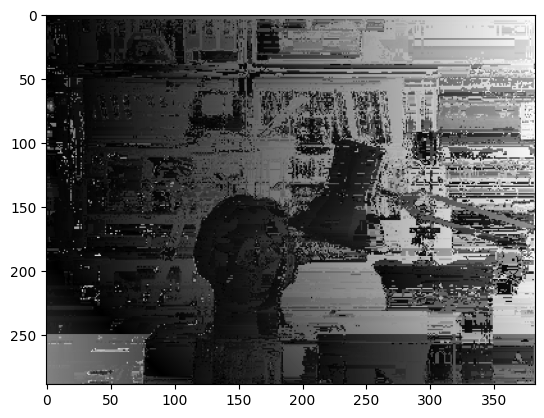

In [13]:
disparity = block_matching(img1L, img1R, 1, 'SAD',numDisparities=img1L.shape[1])
plt.imshow(disparity,'gray')

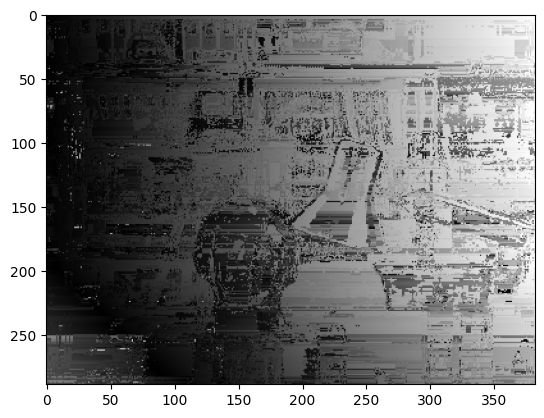

In [14]:
disparity = block_matching(img1L, img1R, 1, 'SSD',numDisparities=img1L.shape[1])
plt.imshow(disparity,'gray')

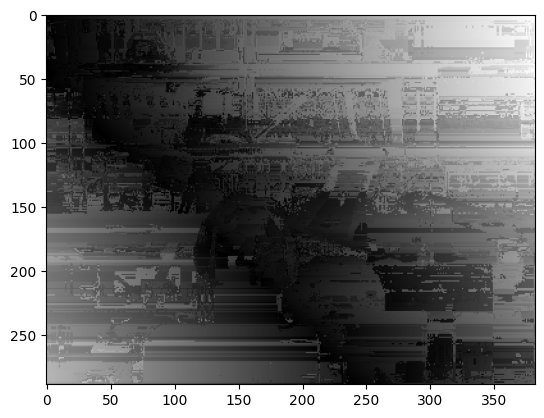

In [11]:
disparity = block_matching(img1L, img1R, 1, 'SAD',numDisparities=100)
plt.imshow(disparity,'gray')

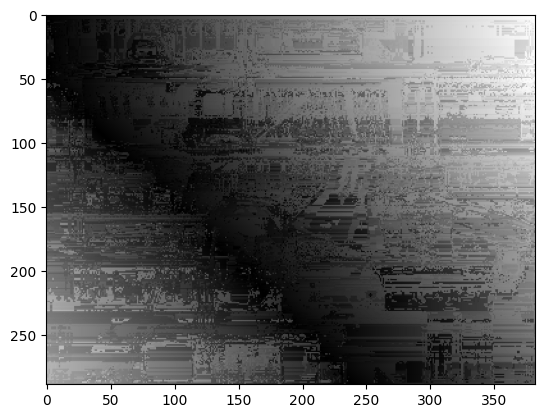

In [10]:
disparity = block_matching(img1L, img1R, 1, 'SSD',numDisparities=100)
plt.imshow(disparity,'gray')

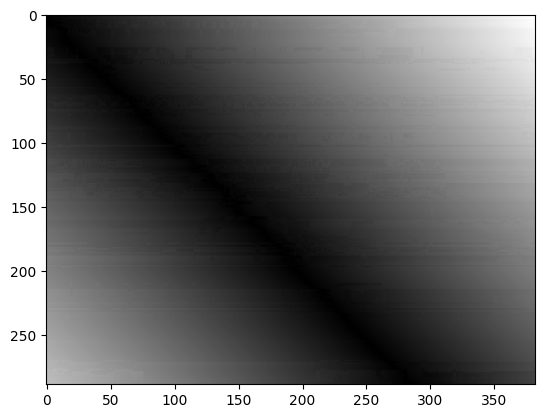

In [97]:
disparity = block_matching(img1L, img1R, 1, 'SAD',numDisparities=10)
plt.imshow(disparity,'gray')

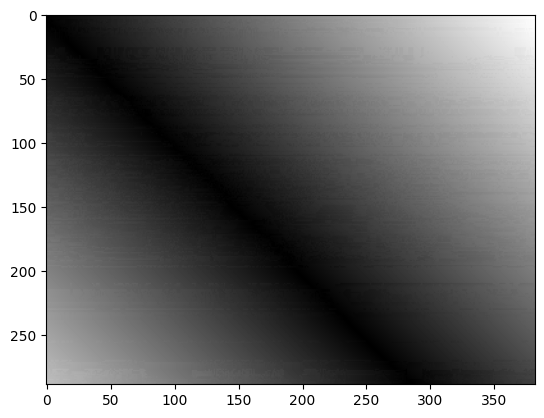

In [12]:
disparity = block_matching(img1L, img1R, 1, 'SSD',numDisparities=10)
plt.imshow(disparity,'gray')

# 1.1.2 Dynamic programming

# 1.2 Bonus